## **LLE (Locally Linear Embedding) Demo**

Here’s a detailed explanation of how to manually perform **Locally Linear Embedding (LLE)** using a given set of 2D points.

---

### **1. Data Preparation**

Consider the following 2D points:
\[
(2, 1), (3, 5), (4, 3), (5, 6), (6, 7), (7, 8)
\]

We organize these points into a matrix \(X\):

X = 
\begin{bmatrix}
2 & 1 \\
3 & 5 \\
4 & 3 \\
5 & 6 \\
6 & 7 \\
7 & 8
\end{bmatrix}


---

### **2. Find Nearest Neighbors**

For each point, we will calculate the Euclidean distance to all other points and select the nearest neighbors. Let’s assume we want **2 nearest neighbors**.

#### **Distance Calculation**

The Euclidean distance between two points $x_i = (x_{i1}, x_{i2})$ and $x_j = (x_{j1}, x_{j2})$ is given by:
$$
d(x_i, x_j) = \sqrt{(x_{i1} - x_{j1})^2 + (x_{i2} - x_{j2})^2}
$$

Compute the pairwise distances for all points:

$$
D = 
\begin{bmatrix}
0     & 4.123 & 2.236 & 5.000 & 7.071 & 8.602 \\
4.123 & 0     & 2.236 & 2.828 & 5.000 & 6.403 \\
2.236 & 2.236 & 0     & 3.162 & 4.472 & 5.831 \\
5.000 & 2.828 & 3.162 & 0     & 1.414 & 2.236 \\
7.071 & 5.000 & 4.472 & 1.414 & 0     & 1.414 \\
8.602 & 6.403 & 5.831 & 2.236 & 1.414 & 0
\end{bmatrix}
$$

For each point, select the 2 smallest distances (ignoring the diagonal, which is 0). The nearest neighbors for each point are:

1. $x_1 = (2, 1)$: Neighbors are $(x_3, x_2)$
2. $x_2 = (3, 5)$: Neighbors are $(x_1, x_3)$
3. $x_3 = (4, 3)$: Neighbors are $(x_1, x_2)$
4. $x_4 = (5, 6)$: Neighbors are $(x_5, x_2)$
5. $x_5 = (6, 7)$: Neighbors are $(x_4, x_6)$
6. $x_6 = (7, 8)$: Neighbors are $(x_5, x_4)$

---

### **3. Compute the Weight Matrix \(W\)**

For each point $x_i$, we now determine weights $w_{ij}$ such that $x_i$ can be approximated by a linear combination of its nearest neighbors:
$$
x_i \approx \sum_{j \in \text{neighbors of } i} w_{ij} x_j
$$

This involves minimizing the reconstruction error:
$$
\epsilon(w) = \| x_i - \sum_{j} w_{ij} x_j \|^2
$$

**Constraint**: The sum of the weights must equal 1:
$$
\sum_{j} w_{ij} = 1
$$

![w formula](f1.png)

### **4. Low-Dimensional Embedding**

Finally, solve the following eigenvalue problem to obtain the lower-dimensional representation:
$$
(M - W)^T (M - W) Y = \lambda Y
$$

Here:
- $M$ is the identity matrix.
- $Y$ are the new low-dimensional coordinates.
- $\lambda$ is a diagonal matrix of **eigenvalues**. These eigenvalues indicate the importance of their corresponding eigenvectors(columns of $Y$) in the low-dimensional representation.


The final result gives the low-dimensional embedding of the points based on preserving local linear relationships.

### **5. Demo using Python**
For practical calculations, we can implement this process using Python. 

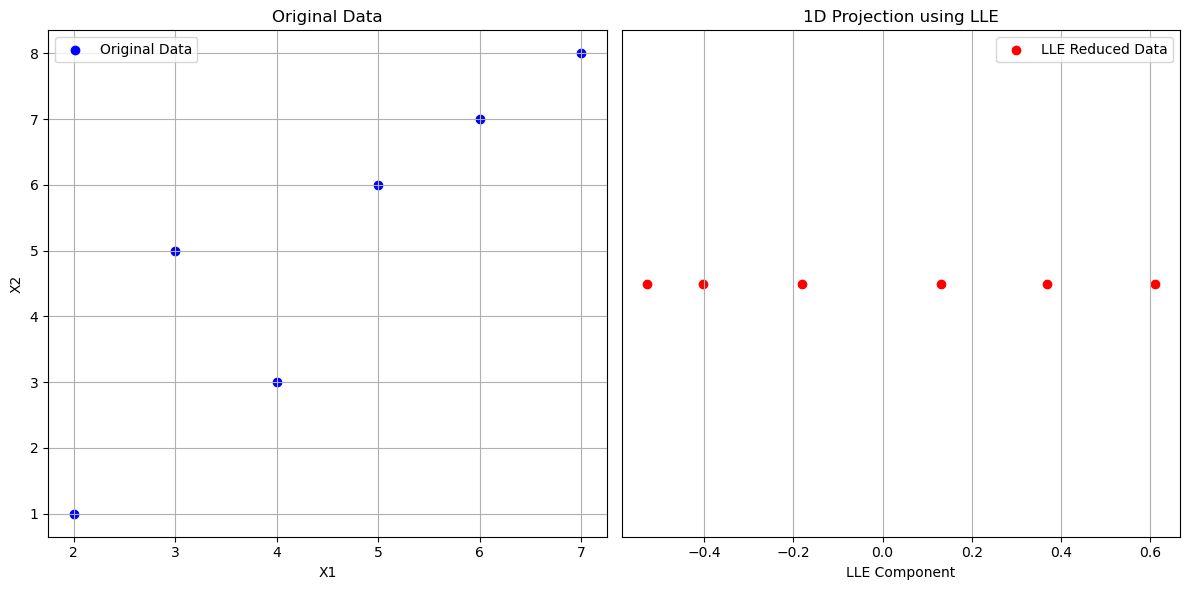

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import LocallyLinearEmbedding

# Step 1: Define the data points
data = np.array([
    [2, 1],
    [3, 5],
    [4, 3],
    [5, 6],
    [6, 7],
    [7, 8]
])

# Step 2: Apply LLE
n_neighbors = 2  # Choosing 2 neighbors
n_components = 1  # Reduce to 1D

lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components)
data_lle = lle.fit_transform(data)

# Step 3: Visualize the original and reduced data
plt.figure(figsize=(12, 6))

# Original 2D data
plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], color='blue', label='Original Data')
plt.title('Original Data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.legend()

# Reduced 1D data
plt.subplot(1, 2, 2)
plt.scatter(data_lle, np.zeros_like(data_lle), color='red', label='LLE Reduced Data')
plt.title('1D Projection using LLE')
plt.xlabel('LLE Component')
plt.yticks([])
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


### **6. Demo using Python**
Another practical example of using **Locally Linear Embedding (LLE)** for dimensionality reduction. We will use the **Swiss Roll dataset**, a synthetic dataset commonly used to demonstrate manifold learning techniques.

In this example:
- Apply **LLE** to reduce the dimensionality of the Swiss Roll dataset from 3D to 2D.
- Visualize the original and reduced datasets to observe how LLE preserves local geometry


#### **Import Libraries and Generate Data**

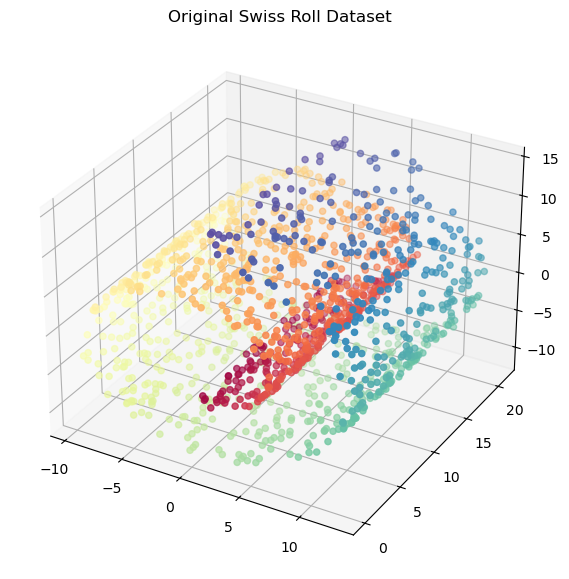

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import LocallyLinearEmbedding

# Generate Swiss Roll dataset
n_samples = 1500
X, color = make_swiss_roll(n_samples, noise=0.1)

# Visualize the original 3D data
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
plt.title("Original Swiss Roll Dataset")
plt.show()


#### **Apply LLE for Dimensionality Reduction**

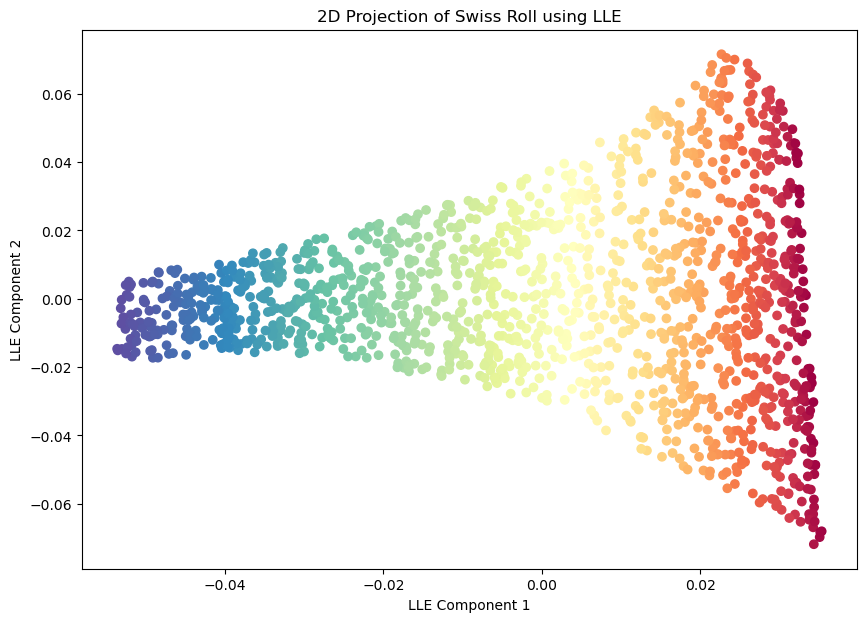

In [16]:
# Apply Locally Linear Embedding
n_neighbors = 12  # Number of neighbors
n_components = 2  # Target dimensionality

lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components, method='standard')
X_lle = lle.fit_transform(X)

# Plot the 2D projection
plt.figure(figsize=(10, 7))
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("2D Projection of Swiss Roll using LLE")
plt.xlabel("LLE Component 1")
plt.ylabel("LLE Component 2")
plt.show()


#### **Tuning Hyperparameters**

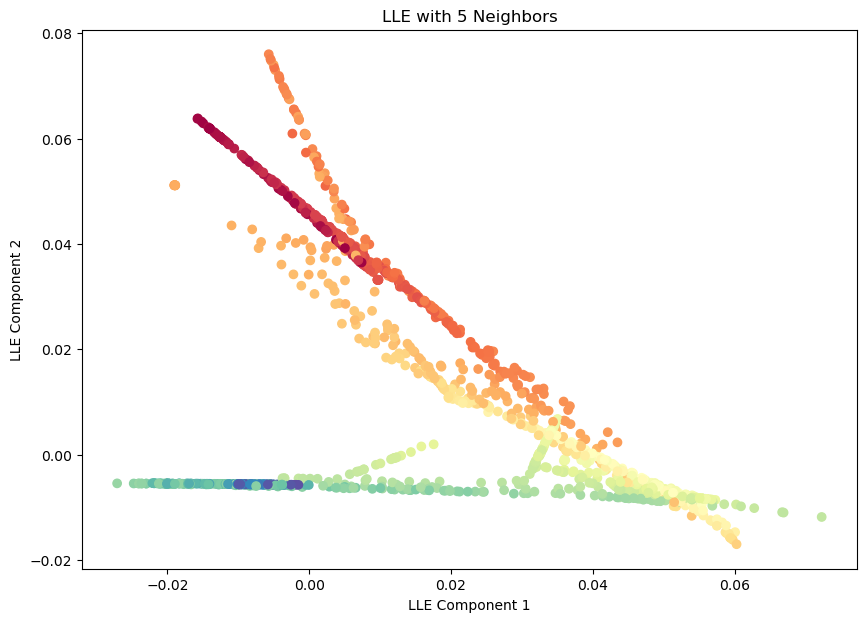

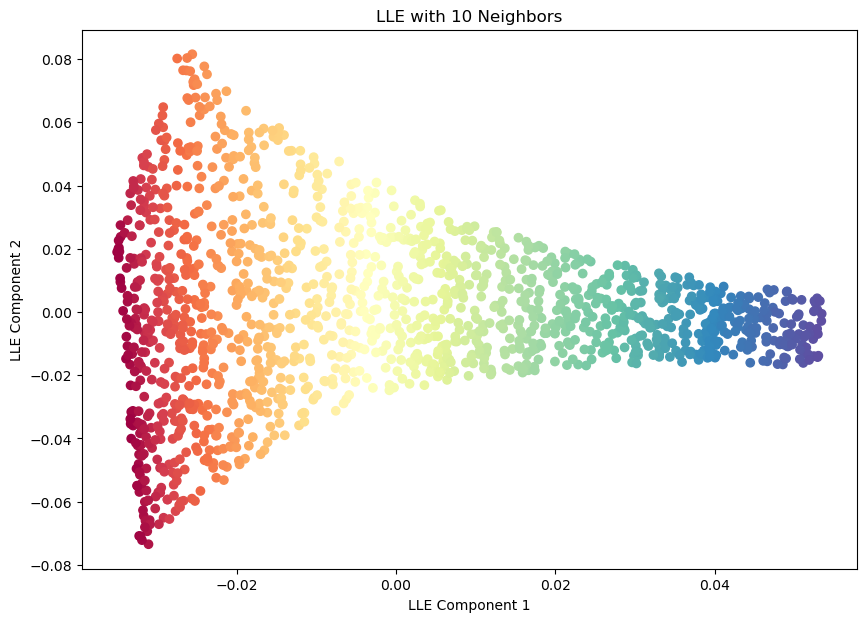

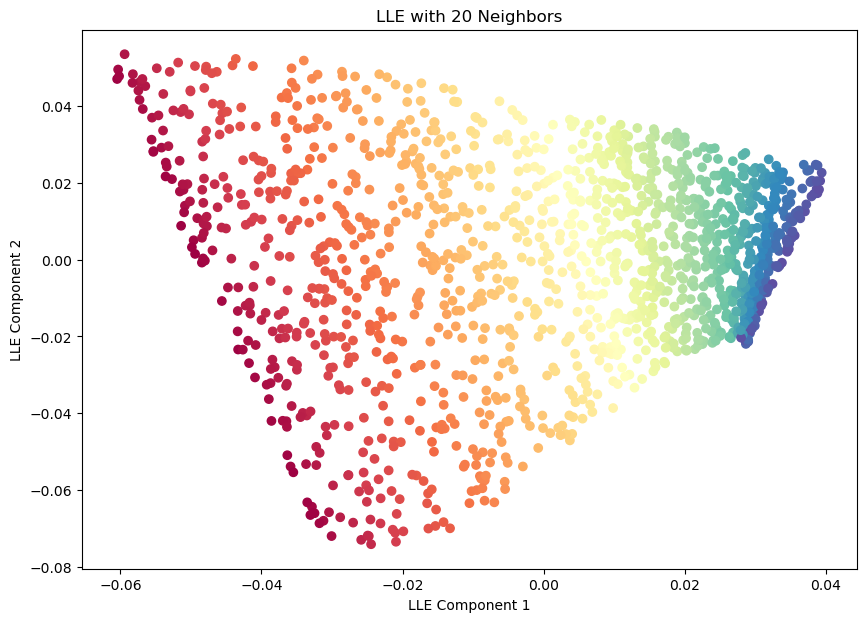

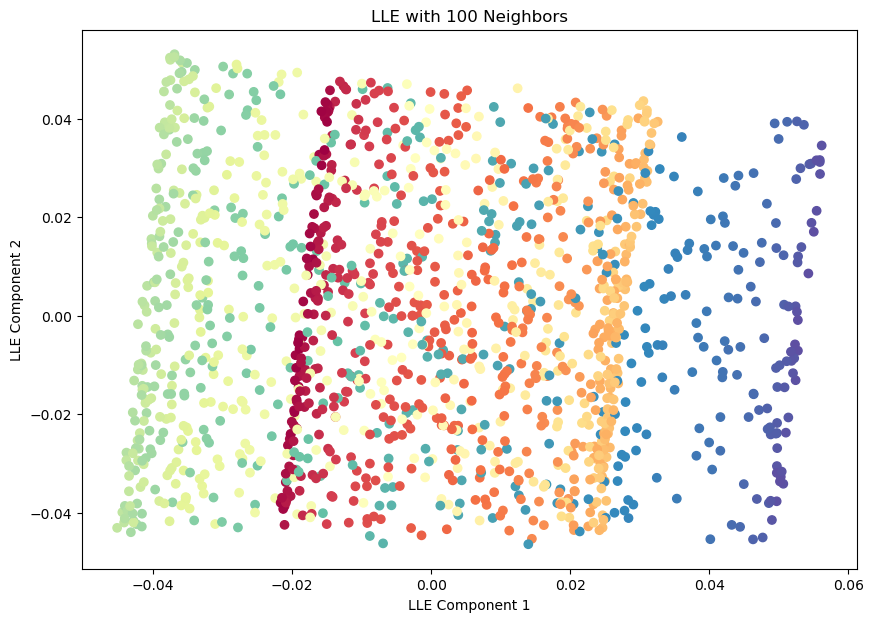

In [18]:
# Test with different number of neighbors
for neighbors in [5, 10, 20,100]:
    lle_experiment = LocallyLinearEmbedding(n_neighbors=neighbors, n_components=2)
    X_lle_experiment = lle_experiment.fit_transform(X)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(X_lle_experiment[:, 0], X_lle_experiment[:, 1], c=color, cmap=plt.cm.Spectral)
    plt.title(f"LLE with {neighbors} Neighbors")
    plt.xlabel("LLE Component 1")
    plt.ylabel("LLE Component 2")
    plt.show()


- **LLE**: Successfully unrolls the manifold, preserving the local relationships between data points in the reduced 2D representation.
- **Hyperparameter Tuning**: Increasing the number of neighbors often smooths the embedding but may lose finer local structures.